-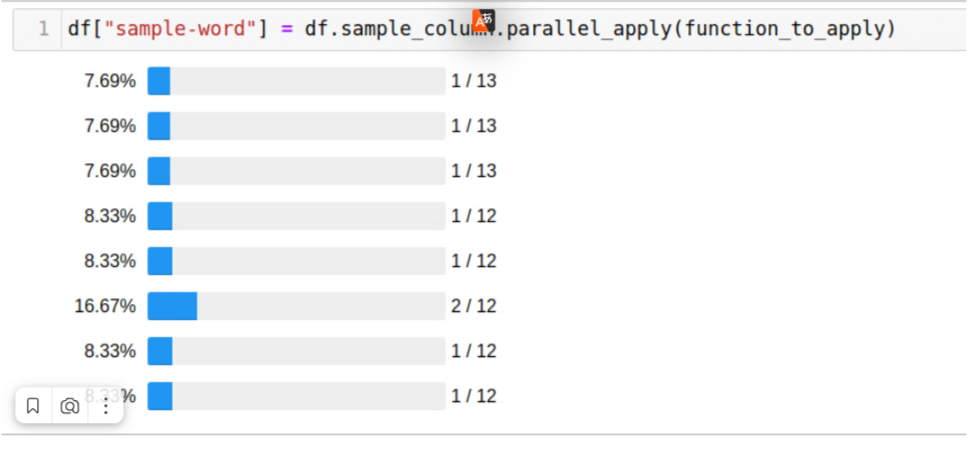 Если рейтинг выше 6 и максимальная скорость поездки меньше 120 км/ч, то стоимость поездки (ride_cost) уменьшите на 5%.

- В противном случае: стоимость поездки (ride_cost) увеличьте на 5%.

In [ ]:
import pandas as pd

def help_fun(df):
  if df['rating'] > 6 and df['speed_max'] < 120:
    return int(df['ride_cost'] / 100 * 95)
  else:
    return int(df['ride_cost'] / 100 * 105)

df['final_ride_cost'] = df.apply(help_fun, axis=1)

Связка group_by + aggregation()

In [ ]:
cols = ["rating", "ride_cost"]

# Производим группировку
rides_info_gr = rides.groupby("car_id", as_index=False)[cols].agg(["count", "mean"])

# Убираем мультииндекс
rides_info_gr.columns = ["_".join(c) for c in rides_info_gr.columns]

# Смотрим результаты (car_id теперь не столбец, а индекс)
rides_info_gr.head()

Используем свои собственные функции

In [ ]:
my_func = lambda x: int(max(x) - min(x))  # Можно использовать свои собственные функции
rides_gr = rides.groupby("car_id", as_index=False).agg(rating_mean=("rating", "mean"),
                                                       ride_duration_sum=("ride_duration", sum))

Merge или concat

In [ ]:
result = rides.merge(cars[['car_id', 'target_class']], on = 'car_id', how = 'right')

Автоматическое добовление без merge:

In [ ]:
rides['car_ride_count'] = rides.groupby('car_id', as_index=False)['user_id'].transform('count')

++ своя функция

In [ ]:
f1 = lambda x: np.percentile(x, 75)
rides['feature_1'] = rides.groupby('user_id', as_index=False)['ride_cost'].transform(f1)

Подождем...

In [ ]:
from tqdm import tqdm

# Вместо обычного for i in range(100) или for x in df.columns
# Добавляем
for i in tqdm(range(100)):
    sleep(0.1)